# Write a python script to implement perceptron training rule and get the appropriate parameters for a single perceptro

In [251]:
import numpy as np

In [252]:
# Predict weights
def predict(x, w, b):
    activation=0
    for i in range (len(x)):
        activation+=w[i]*x[i]
    activation+=b
    return 1.0 if activation>=0.0 else 0.0
    

In [253]:
# Train the perceptron
def fit(X,Y, eta, epochs):
    w=np.random.uniform(0,1, (len(X[0]),1))
    b=np.zeros((1,))
    for epoch in range(epochs):
        Serror=0.0
        for i in range(X.shape[0]):
            yhat=predict(X[i],w,b)            
            error=Y[i]-yhat
            Serror+=error**2
            b=b+eta*error
            for j in range(len(X[i])):                
                w[j]=w[j]+eta* error*X[i][j]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, eta, Serror))
    return w,b
            
    

In [258]:
# The dataset
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=np.array([[2,3],[4,5],[11,11],[4,11],[12,5],[5,2],[6,1],[6,3],[2,10],[4,7],[13,8],[1,6],[6,9]
   ,[10,12],[8,3],  [2,8]])
X=scaler.fit_transform(X)
Y=np.array([0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1])

In [259]:
W,b=fit(X,Y, .1,5)

>epoch=0, lrate=0.100, error=4.000
>epoch=1, lrate=0.100, error=0.000
>epoch=2, lrate=0.100, error=0.000
>epoch=3, lrate=0.100, error=0.000
>epoch=4, lrate=0.100, error=0.000


In [260]:
print(b)

[-0.2]


In [261]:
print(W)

[[-0.1168256 ]
 [ 0.47275287]]


# Write a python script to plot the data points and the obtained decision boundary


In [262]:
import matplotlib.pyplot as plt

def decision_boundary(X,Y,W,b):
    plt.figure(figsize=(10,6))
    plt.grid(True)
    for x, y in zip(X, Y):
        plt.plot(x[0],x[1], 'go' if(y==1) else 'mo')
    # calculatae slope and intercept for two data points
    for i in np.linspace(np.amin(X[:,:1]), np.amax(X[:,:1])):
        m=-(b/W[1])/(b/W[0])
        c=-b/W[1]
        y=(m*i)+c
        plt.plot(i, y, 'bo')

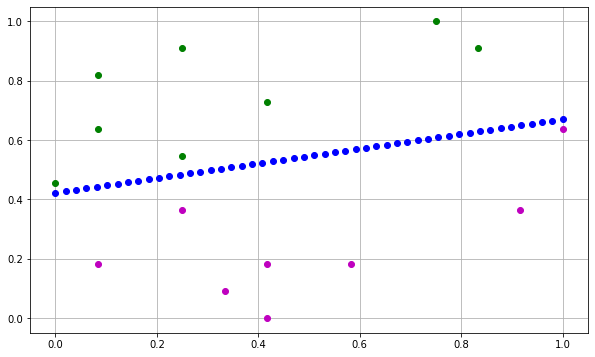

In [263]:
decision_boundary(X,Y,W,b)

#  Show how the decision boundary changed with each iteration


In [264]:
# Train the perceptron
def checkBoundaryPerIteration(X,Y, eta, epochs):
    w=np.random.uniform(0,1, (len(X[0]),1))
    b=np.zeros((1,))
    for epoch in range(epochs):
        Serror=0.0
        for i in range(X.shape[0]):
            yhat=predict(X[i],w,b)            
            error=Y[i]-yhat
            Serror+=error**2
            b=b+eta*error
            for j in range(len(X[i])):                
                w[j]=w[j]+eta* error*X[i][j]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, eta, Serror))    
        decision_boundary(X,Y,w,b)
            
    

>epoch=0, lrate=0.100, error=9.000
>epoch=1, lrate=0.100, error=5.000
>epoch=2, lrate=0.100, error=5.000
>epoch=3, lrate=0.100, error=3.000
>epoch=4, lrate=0.100, error=4.000
>epoch=5, lrate=0.100, error=2.000
>epoch=6, lrate=0.100, error=0.000
>epoch=7, lrate=0.100, error=0.000


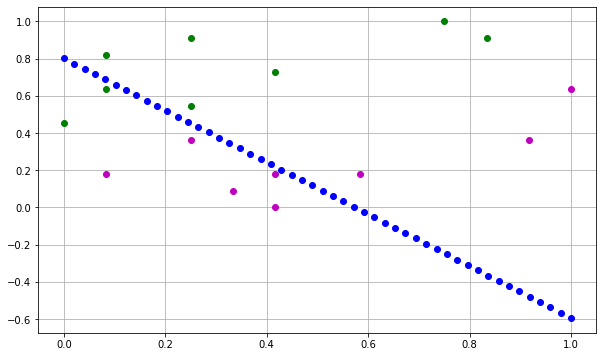

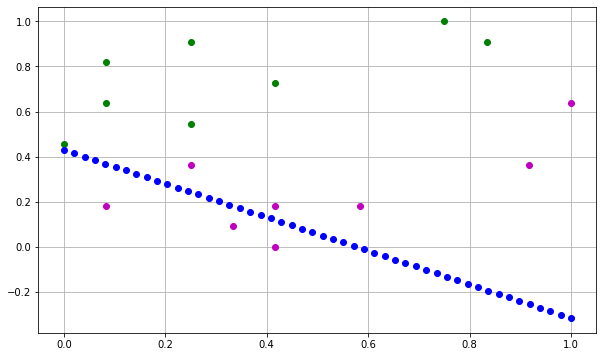

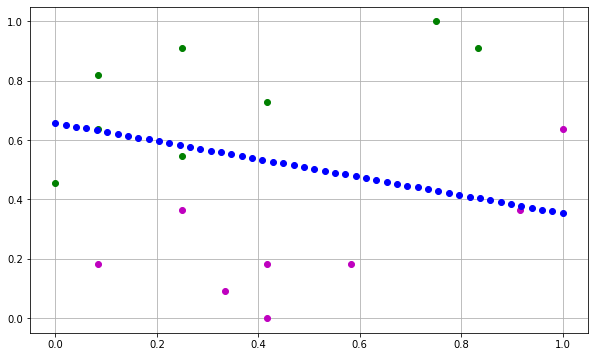

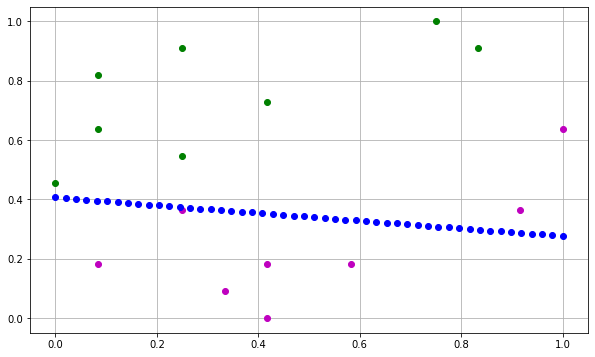

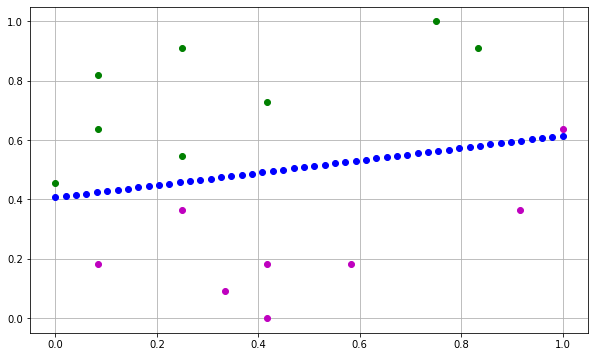

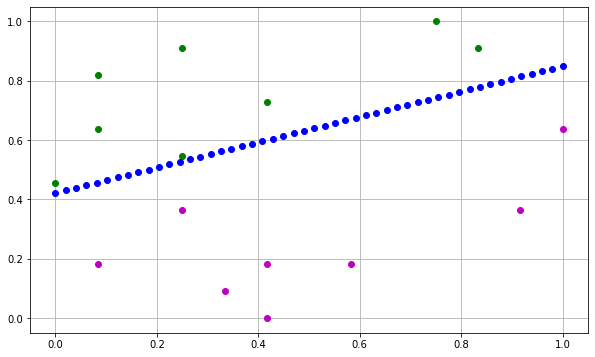

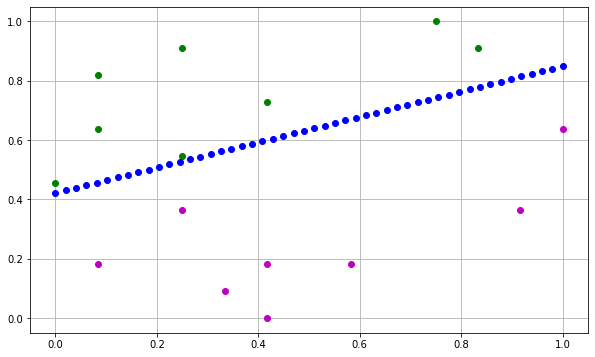

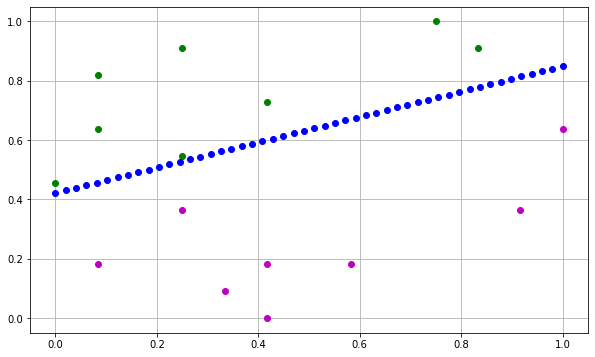

In [267]:
checkBoundaryPerIteration(X, Y, .1, 8)

# Use keras to design the NN model and train on the data given below


In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [11]:
# Prepare the dataset
from sklearn.preprocessing import MinMaxScaler
X=np.array([[10,18],[7,18],[4,17],[3,16],[1,13],[1,10],[11,10],[16,16],[21,6],[26,10],[10,1],[13,7],[18,12],[22,18],[23,10],[8,9],[6,6],[9,8],[13,5],[22,6],[5,1],[19,5],[4,9],[6,9],[3,5],[3,2],[11,3],[19,10],[26,17],[21,4],[22,6],[20,7],[18,16],
[8,3],[21,13],[8,15],[6,14],[9,4],[25,14],[7,4],[9,14],[22,14],[5,13],[8,2],[6,3],[7,3],[8,14],[22,15],[9,12],[7,12]])

scaler=MinMaxScaler()
X=scaler.fit_transform(X)

Y_B=['Blue' for i in range(33)]
Y_R=['Red' for i in range(17)]
Y=Y_B+Y_R
Y=np.array(Y)

In [12]:
# Label categorical inputs
from sklearn import preprocessing
ohe=preprocessing.OneHotEncoder(categories='auto', handle_unknown='ignore')
Y=ohe.fit_transform(Y.reshape(-1,1))

In [13]:
# Define the model
model=Sequential()
model.add(Dense(9,input_dim=2, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='softmax'))
# Compile the model
opt=SGD(lr=.01, momentum=.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


# 2.Report training accuracy and show how error/loss reduces as the training proceeds for your training

In [14]:
# Fit the keras model on the dataset
history=model.fit(X,Y, epochs=100, batch_size=10)


Epoch 1/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6846 - accuracy: 0.5200
Epoch 2/100
50/50 [==============================] - 0s 239us/step - loss: 0.6746 - accuracy: 0.6400
Epoch 3/100
50/50 [==============================] - 0s 219us/step - loss: 0.6649 - accuracy: 0.6600
Epoch 4/100
50/50 [==============================] - 0s 219us/step - loss: 0.6613 - accuracy: 0.6600
Epoch 5/100
50/50 [==============================] - 0s 200us/step - loss: 0.6515 - accuracy: 0.6600
Epoch 6/100
50/50 [==============================] - 0s 219us/step - loss: 0.6547 - accuracy: 0.6600
Epoch 7/100
50/50 [==============================] - 0s 239us/step - loss: 0.6517 - accuracy: 0.6600
Epoch 8/100
50/50 [==============================] - 0s 219us/step - loss: 0.6517 - accuracy: 0.6600
Epoch 9/100
50/50 [==============================] - 0s 239us/step - loss: 0.6514 - accuracy: 0.6600
Epoch 10/100
50/50 [==============================] - 0s 259us/step - loss: 0.6498 - accuracy

50/50 [==============================] - 0s 279us/step - loss: 0.6347 - accuracy: 0.6600
Epoch 82/100
50/50 [==============================] - 0s 259us/step - loss: 0.6341 - accuracy: 0.6600
Epoch 83/100
50/50 [==============================] - 0s 399us/step - loss: 0.6337 - accuracy: 0.6600
Epoch 84/100
50/50 [==============================] - 0s 259us/step - loss: 0.6337 - accuracy: 0.6600
Epoch 85/100
50/50 [==============================] - 0s 399us/step - loss: 0.6338 - accuracy: 0.6600
Epoch 86/100
50/50 [==============================] - 0s 558us/step - loss: 0.6332 - accuracy: 0.6600
Epoch 87/100
50/50 [==============================] - 0s 419us/step - loss: 0.6336 - accuracy: 0.6600
Epoch 88/100
50/50 [==============================] - 0s 359us/step - loss: 0.6334 - accuracy: 0.6600
Epoch 89/100
50/50 [==============================] - 0s 299us/step - loss: 0.6331 - accuracy: 0.6600
Epoch 90/100
50/50 [==============================] - 0s 339us/step - loss: 0.6324 - accuracy: 

In [15]:
# Evaluate the model
loss, accuracy=model.evaluate(X,Y)
print('Training Accuracy = %s' % (accuracy*100))

50/50 [==============================] - 0s 2ms/step
Training Accuracy = 66.00000262260437


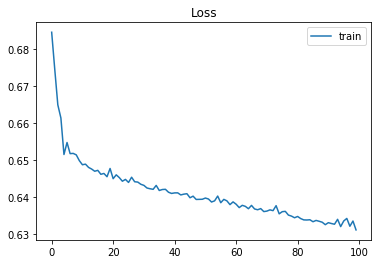

In [16]:
# Plot loss during training
plt.subplot(111)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()

# How many epochs are suﬃcient for the training

# 3.After training, plot the data-points and the decision boundary of all the nine neurons of the ﬁrst layer

# 4.What is the prediction of your model for the point (15,15) and (7,3).


In [459]:
X_test=[[15,15],[7,3]]
X_test=scaler.fit_transform(X_test)
predictions=model.predict(X_test)
print(ohe.inverse_transform(predictions))

[['Blue']
 ['Blue']]
